### Dataset

In [1]:
import pandas as pd
df = pd.read_csv("./batching_results_upload/spark_pandas_scaled_comparison.csv")
df

,dataset,setting,fraction,holdout_accuracy_mean,holdout_accuracy_stddev,time_mean,time_stddev,ratio (spark/pandas)
0,spectf,spark,1024,0.698276,0,62.336005,0,1.519922
1,spectf,pandas,1024,0.698276,0,41.012642,0,1.000000
2,spectf,spark,2048,0.698276,0,131.139000,0,1.297772
3,spectf,pandas,2048,0.698276,0,101.049302,0,1.000000
4,spectf,spark,4096,0.698276,0,207.639216,0,1.306535
...,...,...,...,...,...,...,...,...
75,kr-vs-kp,pandas,2048,0.527962,0,951.416529,0,1.000000
76,kr-vs-kp,spark,4096,0.527962,0,1025.327973,0,0.492222
77,kr-vs-kp,pandas,4096,0.527962,0,2083.061925,0,1.000000
78,kr-vs-kp,spark,8192,0.527962,0,2324.238755,0,0.525030


In [2]:
df_plot = df[["dataset", " fraction", "ratio (spark/pandas)"]]

In [3]:
df_plot

,dataset,fraction,ratio (spark/pandas)
0,spectf,1024,1.519922
1,spectf,1024,1.000000
2,spectf,2048,1.297772
3,spectf,2048,1.000000
4,spectf,4096,1.306535
...,...,...,...
75,kr-vs-kp,2048,1.000000
76,kr-vs-kp,4096,0.492222
77,kr-vs-kp,4096,1.000000
78,kr-vs-kp,8192,0.525030


In [4]:
def prepare_df(df):
    value_col = "ratio (spark/pandas)"
    pivoted = pd.DataFrame.from_records([
        {
            "dataset": dataset,
            "1024":
                df[(df[" fraction"]==1024) & (df["dataset"]==dataset)][value_col].iloc[0],
            "2048":
                df[(df[" fraction"]==2048) & (df["dataset"]==dataset)][value_col].iloc[0],
            "4096":
                df[(df[" fraction"]==4096) & (df["dataset"]==dataset)][value_col].iloc[0],
            "8192":
                df[(df[" fraction"]==8192) & (df["dataset"]==dataset)][value_col].iloc[0],
        }
        for dataset in df["dataset"].unique()
    ])
    return pivoted

df = prepare_df(df_plot)

In [7]:
def plot_summarized_results_horizontal(df):
    import numpy as np
    import matplotlib.pyplot as plt
    df_ops_only = df
    # https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html
    ind = np.flip(np.arange(df_ops_only.shape[0]))
    height=0.2
    fig, ax = plt.subplots()
    ax.barh(
        y=ind + 1.5 * height,
        width=df_ops_only["1024"],
        height=height,
        label="1024"
    )
    ax.barh(
        y=ind + 0.5 * height,
        width=df_ops_only["2048"],
        height=height,
        label="2048"
    )
    ax.barh(
        y=ind - 0.5 * height,
        width=df_ops_only["4096"],
        height=height,
        label="4096"
    )
    ax.barh(
        y=ind - 1.5 * height,
        width=df_ops_only["8192"],
        height=height,
        label="8192"
    )
    ax.set_xlim(0.4, 1.7)
    ax.set_xlabel("Training time, normalized to pandas")
    ax.set_ylabel("dataset")
    ax.set_yticks(ind)
    ax.set_yticklabels(df["dataset"])
    ax.legend(loc="center right", title="upsampling ratio")
    plt.show()

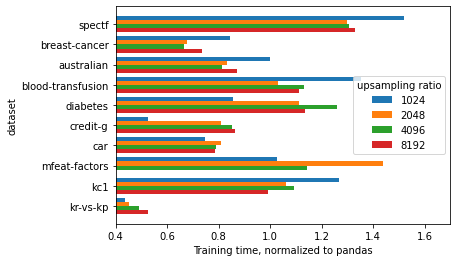

In [8]:
plot_summarized_results_horizontal(df)